In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# tips 가져오기
tips=sns.load_dataset('tips')

In [3]:
tips.shape

(244, 7)

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# 컬럼 데이터type 확인
tips.dtypes


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [8]:
# 명목형변수, 연속형 변수의 기술 통계값 확인
# describe()
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [ ]:
# 각 변수에 대해서 기술 통계값으로 확인할 수 있는 의미(특징)
# 범주형 면수 : sex, smoker,day,time
# 연속형 변수: total_bill, tip, size
# 확인할 사항들 : sex,smoker,day, time

In [10]:
# 결측치 확인
# 없는 값 : NaN, None
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [12]:
# 범주형 변수 파악하기
# 각 카테고리 파악
# 성별: 남자와 여자 손님 수
# 흡연자 : 흡연자와 비흡연자 비율 수
# 요일: 요일별 방문 빈도 수
# 시간대: 시간대별 방문 빈도 수
# matplotlib
# seaborn

In [20]:
# 범주형 변수 파악하기
# 각 카테고리 파악
tips['sex'].unique()

[Female, Male]
Categories (2, object): [Female, Male]

In [22]:
for col in tips.select_dtypes(include='category'):
    print(col,tips[col].unique())

sex [Female, Male]
Categories (2, object): [Female, Male]
smoker [No, Yes]
Categories (2, object): [No, Yes]
day [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]
time [Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]


In [25]:
# 남자 여자 손님 비율 수
#df.values_counts(tips[sex])
# df.value_counts()&plt.bar()
# sns.boxplot(df,value_counts)
# sns.countplot(data='tips',x='sex')

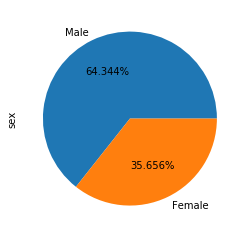

In [28]:
# 각 성별의 전체 대비 비중 => 파이 차트
tips['sex'].value_counts().plot(kind='pie',autopct='%.3f%%')

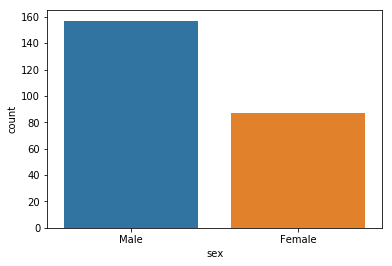

In [11]:
# 남자와 여자 손님 수
# countplot
sns.countplot(tips['sex'])

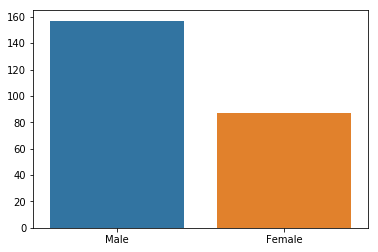

In [19]:
tmp=tips['sex'].value_counts()
sns.barplot(x=tmp.index,y=tmp.values)

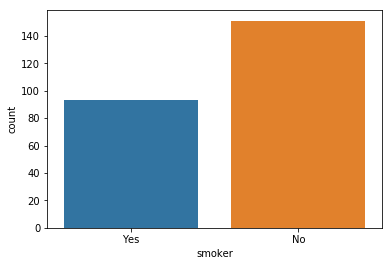

In [14]:
# 흡연자
sns.countplot(tips['smoker'])

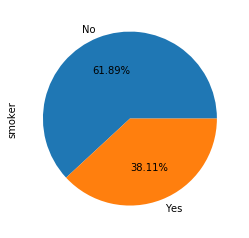

In [30]:
tips['smoker'].value_counts().plot(kind='pie',autopct='%.2f%%')

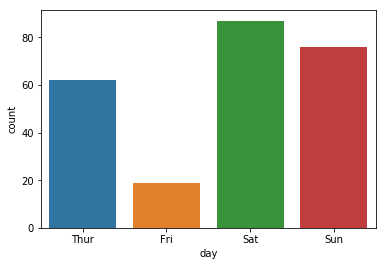

In [16]:
# 요일
sns.countplot(tips['day'])

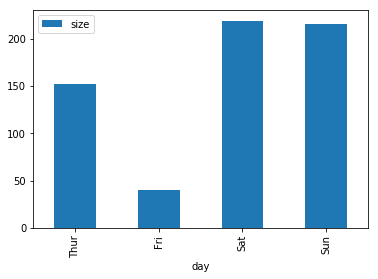

In [49]:
# 요일 별 총 손님 수(size)
# 우리 가게에 무슨 요일에 손님이 가장 많이 올까
tips.pivot_table(index='day',values='size',aggfunc='sum').plot(kind='bar')

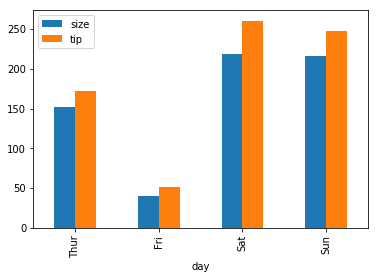

In [52]:
# 요일 별 손님과 총 팁 금액
# 요일 별 총 손님 수가 많을 수록 총 팁 금액이 많을까
tips.pivot_table(index='day',values=['size','tip'],aggfunc='sum').plot(kind='bar')

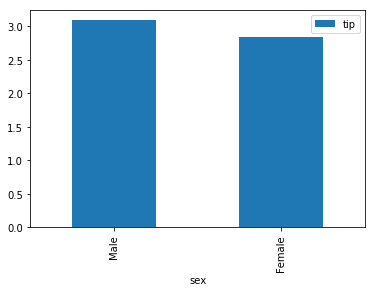

In [55]:
# 성별 평균 팁
# 평균 팁을 가장 많이 준 성별
# 데이터를 가공해서 plot => df.plot(kind='bar')
tips.pivot_table(index='sex',values='tip',aggfunc='mean').plot(kind='bar')

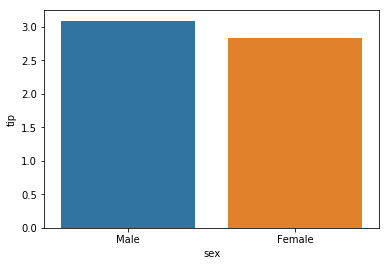

In [6]:
# 데이터를 가공하지 않고 plot => sns.barplot
# estimator=<function mean>
sns.barplot(data=tips,x='sex',y='tip',ci=None)     # 기본값을 평균으로 가지고 있음

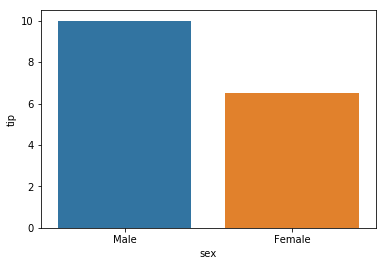

In [61]:
# 성별로 가장 팁을 많이 준 금액
sns.barplot(data=tips,x='sex',y='tip',ci=None,estimator=np.max)

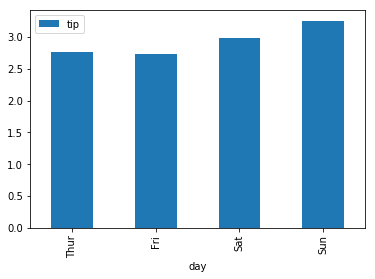

In [62]:
# 평균 팁이 가장 많은 요일 찾기
tips.pivot_table(index='day',values='tip',aggfunc='mean').plot(kind='bar')

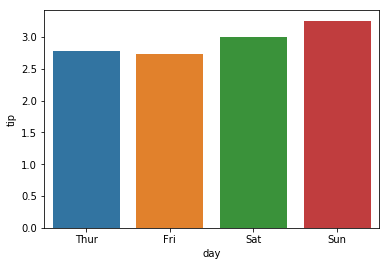

In [64]:
sns.barplot(x='day',y='tip',data=tips,ci=None)

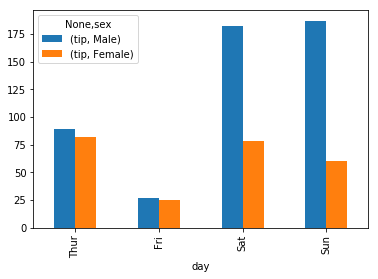

In [72]:
# 요일별 성별 전체 팁 금액 비교
tips.pivot_table(index=['day','sex'],values='tip',aggfunc='sum').unstack().plot(kind='bar') # 기존 데이터프레임의 구조를 unstack

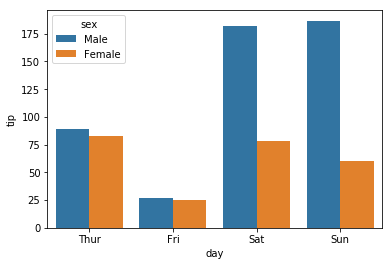

In [75]:
sns.barplot(data=tips,x='day',y='tip',estimator=sum,hue='sex',ci=False)   # hue로 구분

In [76]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

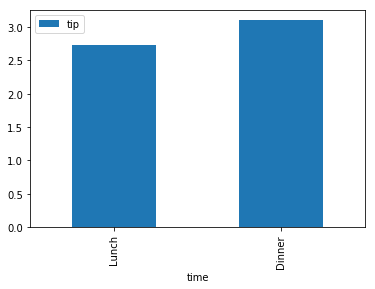

In [84]:
# 시간대별 평균 팁 금액
tips.pivot_table(index='time',values='tip',aggfunc='mean').plot(kind='bar')

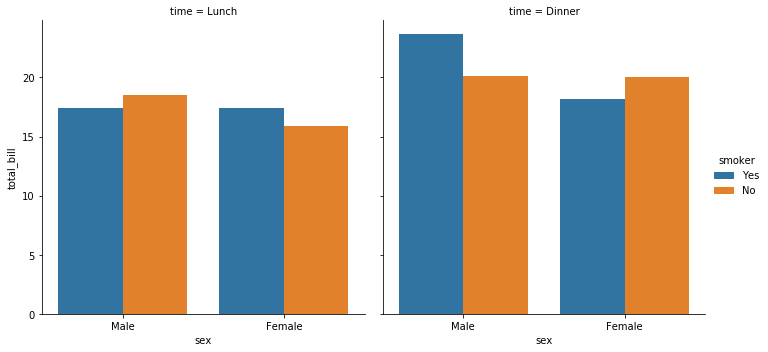

In [7]:
# 시간대 & 성별 & 흡연여부 , 총 3개의 속성을 기준으로 평균 지불 금액 비교
# catplot
# col,x,hue 범주형 데이터에서 활용
sns.catplot(data=tips,col='time',x='sex',y='total_bill',hue='smoker',kind='bar',ci=None)

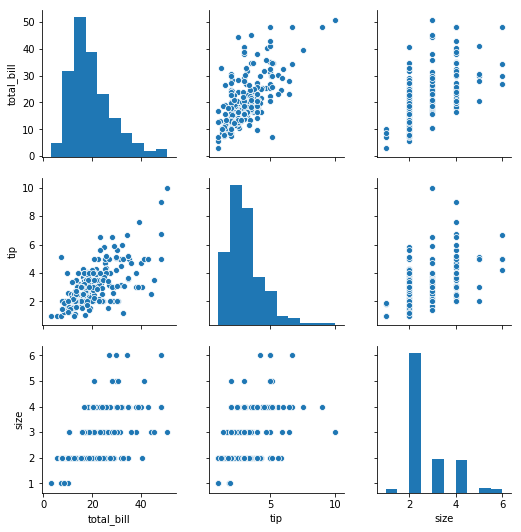

In [95]:
# 양의 상관관계를 가지는 속성 찾기
sns.pairplot(tips)

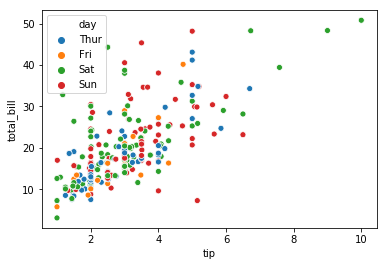

In [101]:
# 양의 상관관계를 가지는 조합 :total_bill ,tip
# 속성조합에 대해 범주형 변수를 색깔로 반영해보기   hue로 설정
sns.scatterplot(data=tips,x='tip',y='total_bill',hue='day')

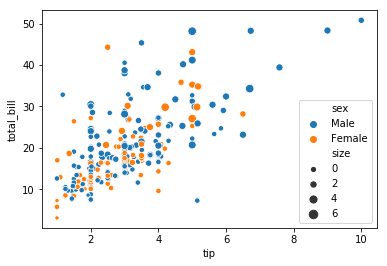

In [102]:
# 양의 상관관계를 가지는 속성 +
# 테이블 당 인원 속성에 대해 산점도의 크기를 사이즈 속성의 값에 따라 크기 반영
sns.scatterplot(data=tips,x='tip',y='total_bill',hue='sex',size='size')